# Getting Started

## Installation

Install the latest version of kerrgeopy using pip

```bash
pip install kerrgeopy
```

## Bound Orbits

Kerrgeopy computes orbits in Boyer-Lindquist coordinates $(t,r,\theta,\phi)$. Taking $M$ to represent the mass of the primary body and working in dimensionless units where $G=c=M=1$, bound orbits are parametrized using the following variables:

$a$ - spin of the primary body
<br>
$p$ - orbital semilatus rectum ($\frac{2r_{\text{min}}r_{\text{max}}}{r_{\text{min}}+r_{\text{max}}}$)
<br>
$e$ - orbital eccentricity ($\frac{r_{\text{max}}-r_{\text{min}}}{r_{\text{max}}+r_{\text{min}}}$)
<br>
$x$ - cosine of the orbital inclination ($\cos{\theta_{\text{inc}}}$)
<br>

Note that $a$ and $x$ are restricted to values between -1 and 1, while $e$ is restricted to values between 0 and 1. Retrograde orbits are represented using a negative value for $a$ or for $x$. Polar orbits, marginally bound orbits, and orbits around an extreme Kerr black hole are not supported. 

First, construct a [`BoundOrbit`](bound_orbit.BoundOrbit) using the four parameters described above.

In [2]:
import kerrgeopy as kg
from math import cos, pi

orbit = kg.BoundOrbit(0.999,3,0.4,cos(pi/6))

Plot the orbit from $\lambda = 0$ to $\lambda = 10$ using the [`plot()`](bound_orbit.BoundOrbit.plot) method

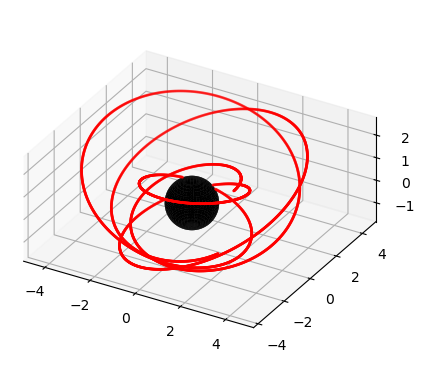

In [3]:
fig, ax = orbit.plot(0,10)

Next, compute the time, radial, polar and azimuthal components of the trajectory as a function of Mino time using the [`trajectory()`](bound_orbit.BoundOrbit.trajectory) method

In [4]:
t, r, theta, phi = orbit.trajectory()

Text(0, 0.5, '$\\phi(\\lambda)$')

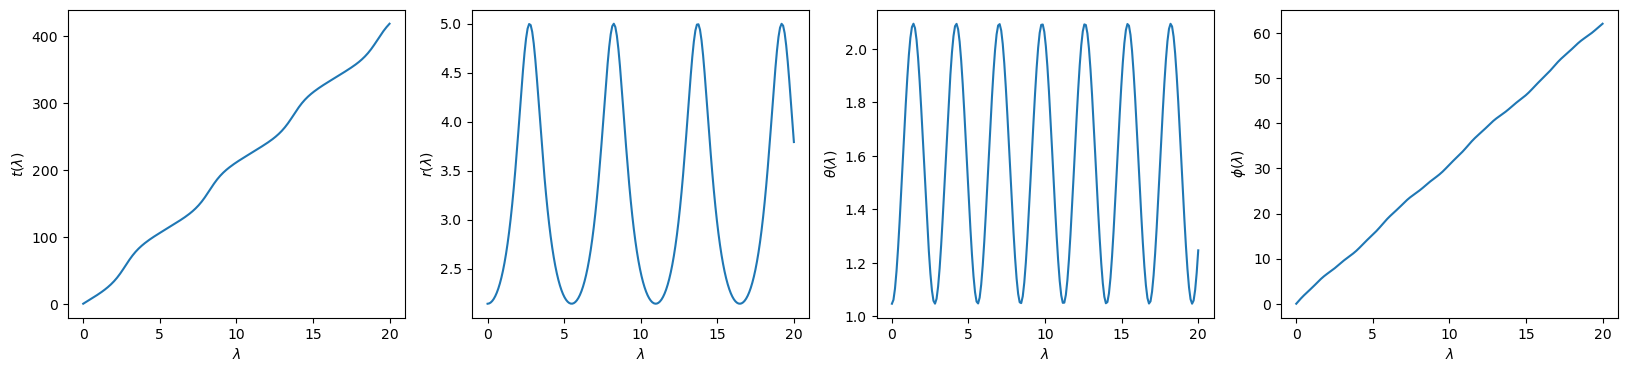

In [5]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

## Orbital Properties

Use the [`constants_of_motion()`](bound_orbit.BoundOrbit.constants_of_motion) method to compute the dimensionless energy, angular momentum and carter constant. Frequencies of motion can be computed in Mino time using the [`mino_frequencies()`](bound_orbit.BoundOrbit.mino_frequencies) method and in Boyer-Lindquist time using the [`observer_frequencies()`](bound_orbit.BoundOrbit.observer_frequencies) method.

In [6]:
from IPython.display import display, Math

E, L, Q = orbit.constants_of_motion()

upsilon_r, upsilon_theta, upsilon_phi, gamma = orbit.mino_frequencies()

omega_r, omega_theta, omega_phi = orbit.observer_frequencies()


display(Math(fr"a = {orbit.a} \quad p = {orbit.p} \quad e = {orbit.e} \quad x = {orbit.x}"))

display(Math(fr"E = {E:.3f} \quad L = {L:.3f} \quad Q = {Q:.3f}"))

display(Math(fr"""\Upsilon_r = {upsilon_r:.3f} \quad 
             \Upsilon_\theta = {upsilon_theta:.3f} \quad 
             \Upsilon_\phi = {upsilon_phi:.3f} \quad 
             \Gamma = {gamma:.3f}"""))

display(Math(fr"""\Omega_r = {omega_r:.3f} \quad
            \Omega_\theta = {omega_theta:.3f} \quad
            \Omega_\phi = {omega_phi:.3f}"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Units

If the masses of the two bodies are defined, then kerrgeopy can also compute constants and frequencies of motion in physical units. `M` and `mu` define the mass of the primary and secondary body respectively in solar masses.

In [19]:
orbit = kg.BoundOrbit(0.999,3,0.4,cos(pi/6), M=1e6, mu=10)

In [20]:
from IPython.display import display, Math

E, L, Q = orbit.constants_of_motion(units="mks")

upsilon_r, upsilon_theta, upsilon_phi, gamma = orbit.mino_frequencies(units="mks")

omega_r, omega_theta, omega_phi = orbit.observer_frequencies(units="mHz")


display(Math(fr"M = {orbit.M:g} \text{{ M}}_\odot \quad \mu = {orbit.mu} \text{{ M}}_\odot"))

display(Math(fr"a = {orbit.a} \quad p = {orbit.p} \quad e = {orbit.e} \quad x = {orbit.x}"))

display(Math(fr"""E = {E:.3e} \text{{ J}} 
             \quad L = {L:.3e} \text{{ kg m}}^2 \text{{s}}^{{-1}} 
             \quad Q = {Q:.3e} \text{{ kg}}^2 \text{{m}}^4 \text{{s}}^{{-2}}"""))

display(Math(fr"""\Upsilon_r = {upsilon_r:.3f} \text{{ s}} \quad 
             \Upsilon_\theta = {upsilon_theta:.3f} \text{{ s}} \quad 
             \Upsilon_\phi = {upsilon_phi:.3f} \text{{ s}} \quad 
             \Gamma = {gamma:.3f} \text{{ s}}^2"""))

display(Math(fr"""\Omega_r = {omega_r:.3f} \text{{ mHz}} \quad
            \Omega_\theta = {omega_theta:.3f} \text{{ mHz}}\quad
            \Omega_\phi = {omega_phi:.3f} \text{{ mHz}}"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Plunging Orbits

Plunging orbits are parametrized using the spin parameter and the three constants of motion.

$a$ - dimensionless spin of the primary
<br>
$\mathcal{E}$ - dimensionless energy
<br>
$\mathcal{L}$ - dimensionless angular momentum
<br>
$Q$ - dimensionless carter constant
<br>

Construct a [`PlungingOrbit`](plunging_orbit.PlungingOrbit) by passing in these four parameters.

In [6]:
orbit = kg.PlungingOrbit(0.9, 0.94, 0.1, 12)

As before, the components of the trajectory can be computed using the [`trajectory()`](plunging_orbit.PlungingOrbit.trajectory) method

In [7]:
t, r, theta, phi = orbit.trajectory()

Text(0, 0.5, '$\\phi(\\lambda)$')

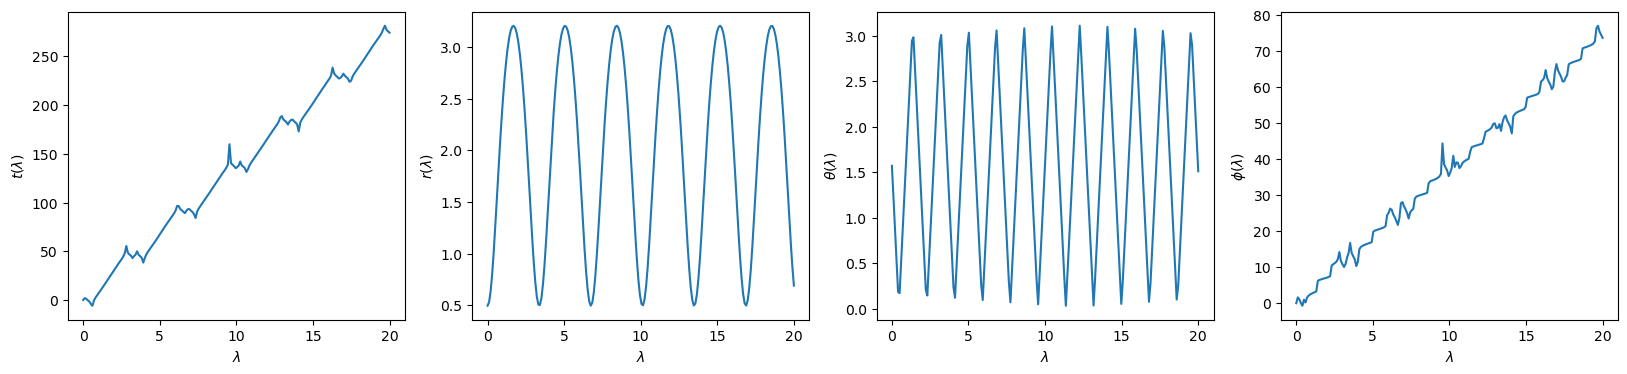

In [8]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

## Separatrix

The separatrix is the boundary in parameter space between stable and unstable orbits. Kerrgeopy provides a [`separatrix()`](constants.separatrix) method for computing the value of $p$ at the separatrix given values for $a$, $e$ and $x$. If $e$ is set to 0 and $x$ is set to 1, this gives the radius of the innermost stable circular orbit.

In [19]:
kg.separatrix(0.5,0.5,0.5)

5.860560368032176

For better performance, use the [`fast_separatrix()`](constants.fast_separatrix) method to construct a faster separatrix function for a given value of $a$ by interpolating from a grid of $e$ and $x$ values. The function returned by this method is slightly less accurate but runs around 100 times faster.

In [20]:
fast_sep = kg.fast_separatrix(a=0.5)
fast_sep(0.5,0.5)

array([[5.86056037]])

In [23]:
%timeit kg.separatrix(0.5,0.5,0.5)

86.7 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [22]:
%timeit fast_sep(0.5,0.5)

947 ns ± 5.48 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
